In [2]:
import pandas as pd
import numpy as np

subpath = "experiment_4_7200samples/2025-02-21T18:44:13"
data = pd.read_csv(f'{subpath}/total_X.csv', index_col=False)


In [3]:
data

,experimento,período,carga,apps,feature,método,nmae,função
0,3,256,FlashcrowdLoad,BothApps,DispFrames,RT,0.168738,raw
1,3,256,FlashcrowdLoad,BothApps,DispFrames,RF,0.168738,raw
2,2,256,FlashcrowdLoad,BothApps,DispFrames,RT,0.088137,média
3,2,256,FlashcrowdLoad,BothApps,DispFrames,RF,0.148685,média
4,2,256,FlashcrowdLoad,BothApps,DispFrames,RT,0.168738,máximo
...,...,...,...,...,...,...,...,...
299,2,2,PeriodicLoad,SingleApp,DispFrames,RF,0.070831,máximo
300,2,2,PeriodicLoad,SingleApp,DispFrames,RT,0.072891,mínimo
301,2,2,PeriodicLoad,SingleApp,DispFrames,RF,0.070606,mínimo
302,1,2,PeriodicLoad,SingleApp,DispFrames,RT,0.069319,raw


In [4]:
group = data.groupby(["período"])['nmae'].agg(['mean', 'std']).reset_index()
group['std'] = round(100*group['std'], 0)
group['mean'] = round(100*group['mean'], 0)
group

,período,mean,std
0,2,8.0,1.0
1,4,9.0,2.0
2,8,9.0,2.0
3,16,9.0,2.0
4,32,10.0,3.0
5,64,11.0,3.0
6,128,13.0,4.0
7,256,12.0,5.0


In [5]:
import scipy.stats as st

group = data.groupby(["período", "experimento"])['nmae'].agg(['mean', 'std', 'count']).reset_index()

# Compute standard error
group['se'] = group['std'] / np.sqrt(group['count'])

# Compute 95% confidence interval
group['ci'] = group.apply(lambda row: st.t.ppf(0.975, df=row['count']-1) * row['se'], axis=1)

# Print results as "mean ± ci"
for _, row in group.iterrows():
  print(f"Experimento {row['experimento']} - {row['período']}: {row['mean']:.3f} ± {row['ci']:.3f}")

group

Experimento 1.0 - 2.0: 0.082 ± 0.012
Experimento 2.0 - 2.0: 0.084 ± 0.006
Experimento 1.0 - 4.0: 0.088 ± 0.014
Experimento 2.0 - 4.0: 0.091 ± 0.006
Experimento 1.0 - 8.0: 0.088 ± 0.017
Experimento 2.0 - 8.0: 0.095 ± 0.006
Experimento 3.0 - 8.0: 0.098 ± 0.012
Experimento 1.0 - 16.0: 0.092 ± 0.022
Experimento 2.0 - 16.0: 0.093 ± 0.006
Experimento 3.0 - 16.0: 0.093 ± 0.004
Experimento 1.0 - 32.0: 0.104 ± 0.038
Experimento 2.0 - 32.0: 0.096 ± 0.009
Experimento 3.0 - 32.0: 0.092 ± 0.011
Experimento 1.0 - 64.0: 0.091 ± 0.024
Experimento 2.0 - 64.0: 0.110 ± 0.013
Experimento 3.0 - 64.0: 0.118 ± 0.042
Experimento 1.0 - 128.0: 0.093 ± 0.042
Experimento 2.0 - 128.0: 0.134 ± 0.015
Experimento 3.0 - 128.0: 0.145 ± 0.013
Experimento 1.0 - 256.0: 0.121 ± 0.038
Experimento 2.0 - 256.0: 0.121 ± 0.022
Experimento 3.0 - 256.0: 0.130 ± 0.037


,período,experimento,mean,std,count,se,ci
0,2,1,0.082257,0.014084,8,0.004979,0.011774
1,2,2,0.084493,0.014378,24,0.002935,0.006071
2,4,1,0.087726,0.017314,8,0.006121,0.014474
3,4,2,0.090741,0.015006,24,0.003063,0.006336
4,8,1,0.087929,0.020703,8,0.007320,0.017308
5,8,2,0.094941,0.014536,24,0.002967,0.006138
6,8,3,0.098469,0.014477,8,0.005118,0.012103
7,16,1,0.092106,0.026514,8,0.009374,0.022166
8,16,2,0.093150,0.013641,24,0.002785,0.005760
9,16,3,0.093156,0.005148,8,0.001820,0.004304


In [6]:
group = data.groupby(["período", "função"])['nmae'].agg(['mean', 'std']).reset_index()
group['std'] = round(100*group['std'], 0)
group['mean'] = round(100*group['mean'], 0)
group

,período,função,mean,std
0,2,máximo,8.0,2.0
1,2,média,8.0,1.0
2,2,mínimo,9.0,2.0
3,2,raw,8.0,1.0
4,4,máximo,9.0,2.0
5,4,média,9.0,1.0
6,4,mínimo,9.0,1.0
7,4,raw,9.0,2.0
8,8,máximo,10.0,2.0
9,8,média,9.0,1.0


In [7]:
new_data = pd.DataFrame({'período': [1], 'mean': [12], 'std': [2]})

total_table = pd.concat([group, new_data], ignore_index=True)


In [8]:
total_table.set_index('período', inplace=True)

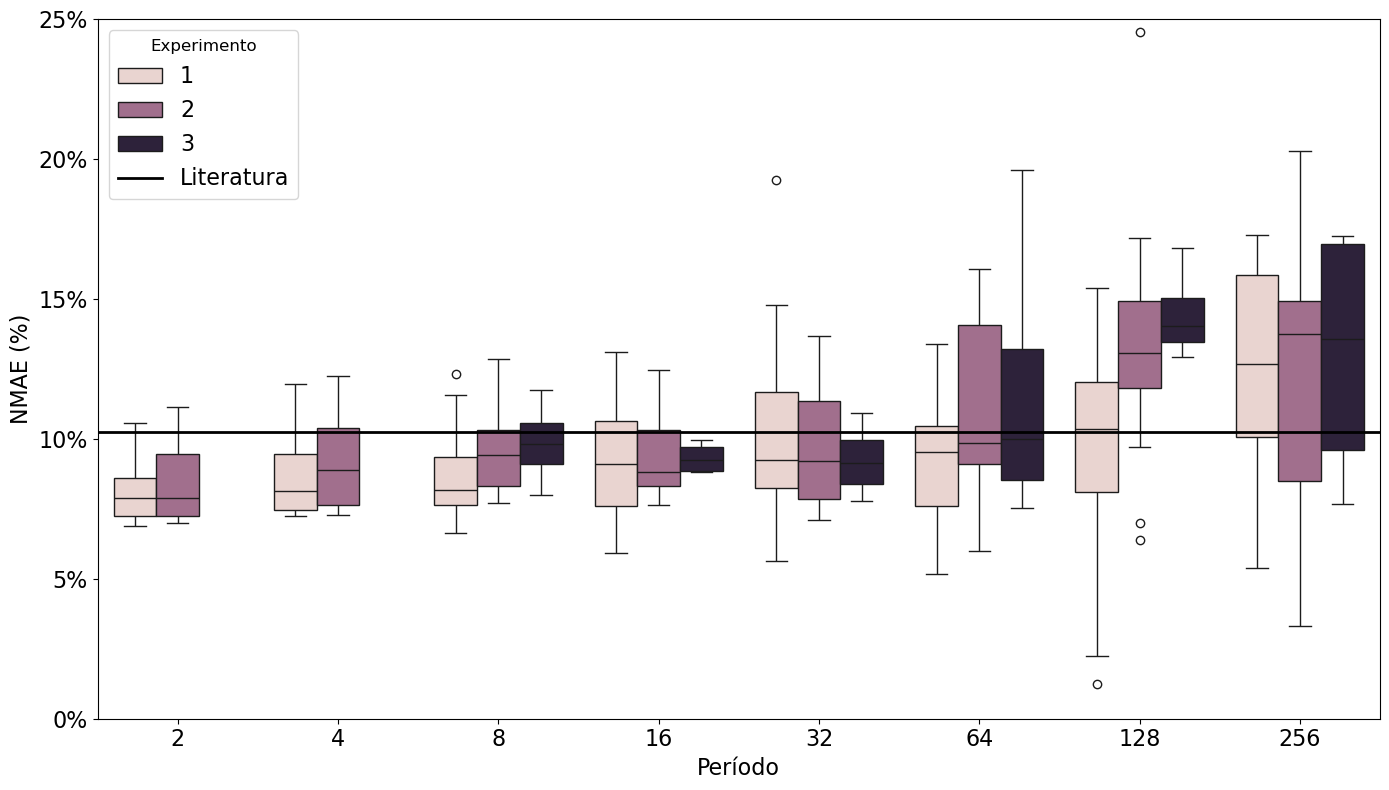

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


#reference_split = pd.read_csv(f'distrib_experiment_y_original/2025-01-05T17:06:02/minimal_with_univariate.csv', index_col=False)
#reference_tptt = pd.read_csv(f'distrib_tptt_experiment_y_original/2025-01-20T17:47:12/minimal_with_univariate.csv', index_col=False)

#data['Experimento'] = 'K-Fold'
#reference_split['Experimento'] = 'Split'
#reference_tptt['Experimento'] = 'TPTT'
data.rename(columns={'experimento': 'Experimento'}, inplace=True)
data_combined = pd.concat([data], ignore_index=True)


plt.figure(figsize=(14, 8))
sns.boxplot(x='período', y='nmae', data=data_combined, hue="Experimento") #hue='Experimento')
plt.axhline(y=0.1025, color='black', linestyle='-', linewidth=2, label='Literatura')
#plt.axhline(y=0.105, color='black', linestyle='-.', linewidth=2, label='Literatura com Seleção de Características')

plt.xlabel("Período", fontsize=16)
plt.ylabel("NMAE (%)", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

plt.rcParams['legend.title_fontsize'] = 'large'
plt.legend(fontsize=16, title="Experimento")
plt.ylim((0, 0.25))

plt.tight_layout()

plt.show()

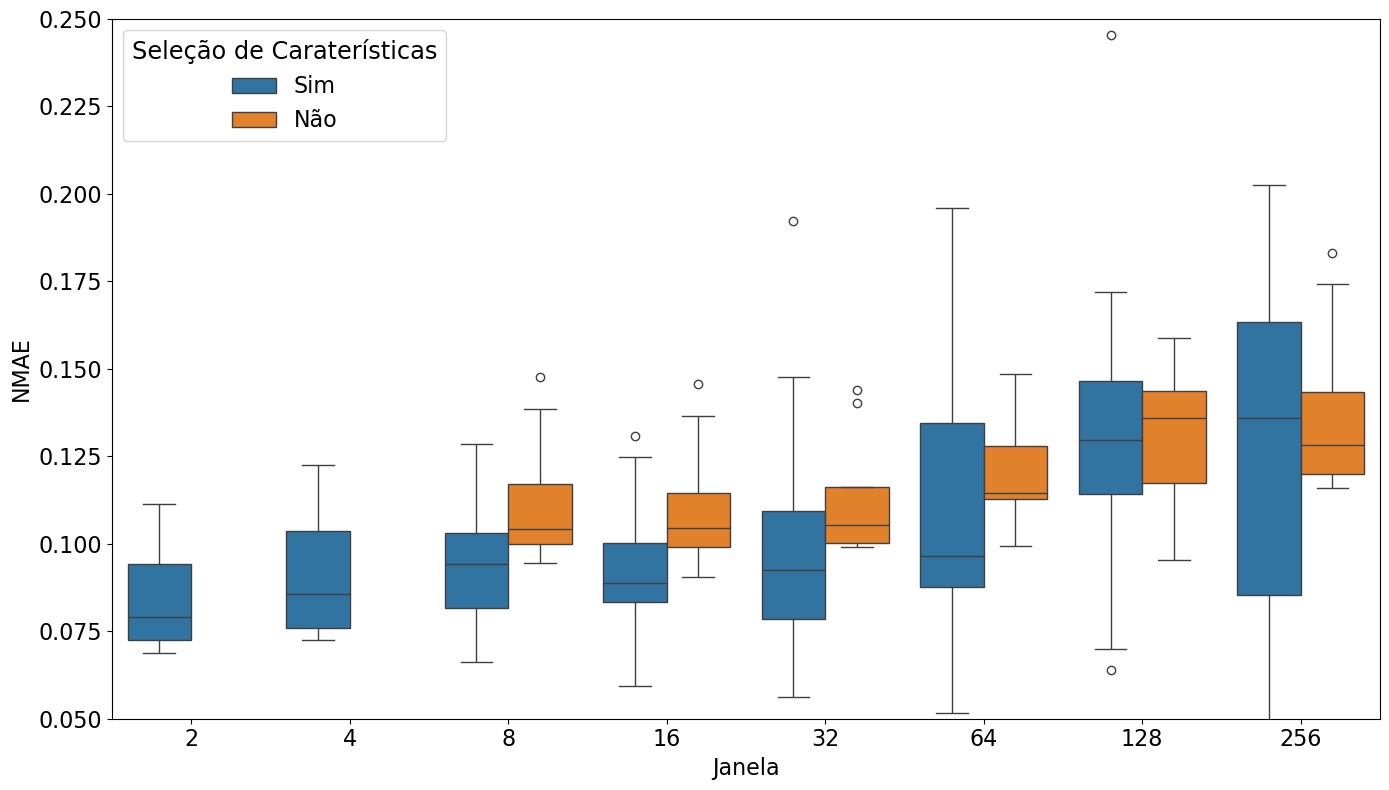

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

total_X = pd.read_csv(f'distrib_experiment_y_original_k_fold/2025-02-20T21:51:58/total_X.csv', index_col=False)

data['Seleção de Caraterísticas'] = 'Sim'
total_X['Seleção de Caraterísticas'] = 'Não'
data_combined = pd.concat([total_X, data], ignore_index=True)


plt.figure(figsize=(14, 8))
sns.boxplot(x='período', y='nmae', data=data_combined, hue='Seleção de Caraterísticas')

plt.xlabel("Janela", fontsize=16)
plt.ylabel("NMAE", fontsize=16)
#plt.title("NMAE Janelas com Distribuições por período", fontsize=14)
plt.xticks(fontsize=16)
plt.ylim((0.05, 0.25))
plt.yticks(fontsize=16)
plt.rcParams['legend.title_fontsize'] = 'xx-large'

plt.legend(title='Seleção de Caraterísticas', prop={'size': 16})

plt.tight_layout()

plt.show()

In [11]:
group_by_method = data.groupby(["período", "método"])['nmae'].agg(['mean', 'std']).reset_index()

In [12]:
group_by_method['std'] = round(100*group_by_method['std'], 0)
group_by_method['mean'] = round(100*group_by_method['mean'], 0)

In [13]:
group_by_method

,período,método,mean,std
0,2,RF,8.0,1.0
1,2,RT,9.0,1.0
2,4,RF,9.0,1.0
3,4,RT,9.0,2.0
4,8,RF,9.0,1.0
5,8,RT,10.0,2.0
6,16,RF,9.0,1.0
7,16,RT,10.0,2.0
8,32,RF,9.0,2.0
9,32,RT,10.0,3.0


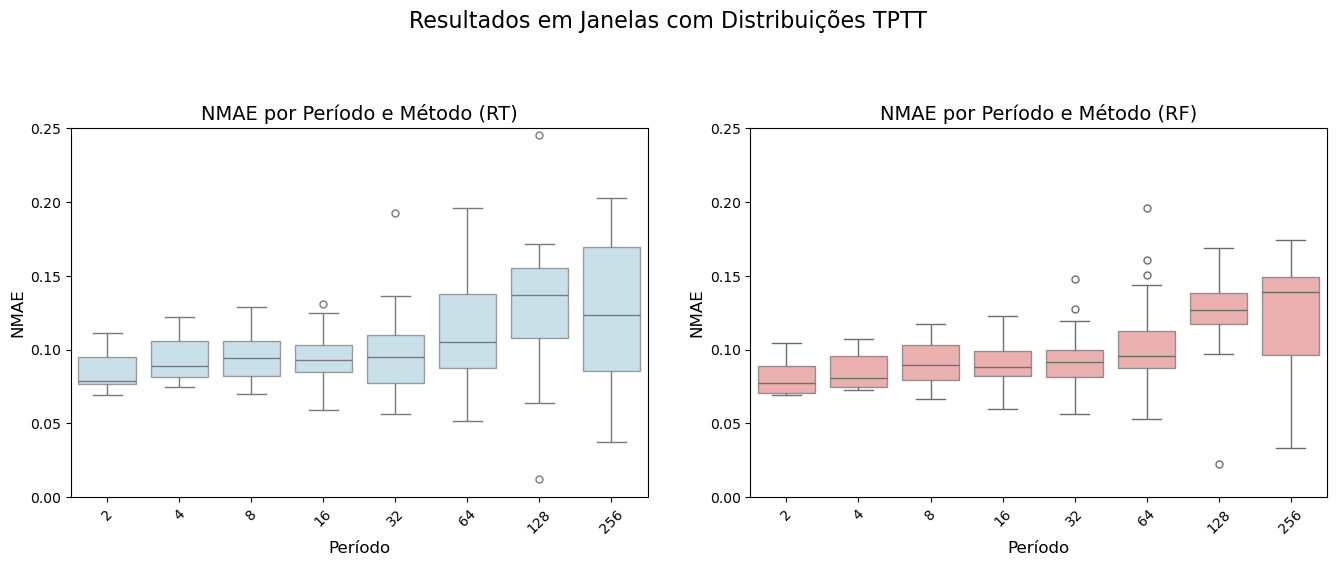

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

y_limits = (0, 0.25)

sns.boxplot(x='período', y='nmae', data=data[data['método'] == 'RT'],
            color="lightblue", boxprops=dict(alpha=0.7), fliersize=5, ax=axes[0])
axes[0].set_ylim(y_limits)
axes[0].set_xlabel("Período", fontsize=12)
axes[0].set_ylabel("NMAE", fontsize=12)
axes[0].set_title("NMAE por Período e Método (RT)", fontsize=14)
axes[0].tick_params(axis='x', rotation=45, labelsize=10)
axes[0].tick_params(axis='y', labelsize=10)

sns.boxplot(x='período', y='nmae', data=data[data['método'] == 'RF'],
            color="lightcoral", boxprops=dict(alpha=0.7), fliersize=5, ax=axes[1])
axes[1].set_ylim(y_limits)
axes[1].set_xlabel("Período", fontsize=12)
axes[1].set_ylabel("NMAE", fontsize=12)
axes[1].set_title("NMAE por Período e Método (RF)", fontsize=14)
axes[1].tick_params(axis='x', rotation=45, labelsize=10)
axes[1].tick_params(axis='y', labelsize=10)

fig.suptitle("Resultados em Janelas com Distribuições TPTT", fontsize=16)

plt.tight_layout(pad=3.0)

plt.show()


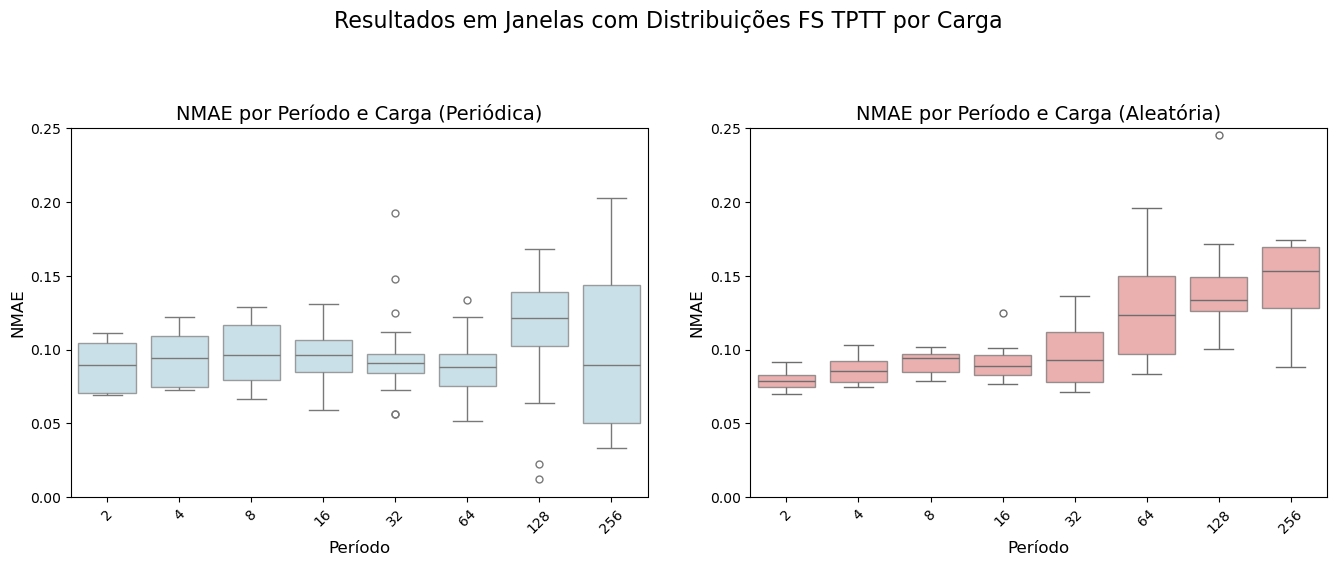

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

y_limits = (0, 0.25)

sns.boxplot(x='período', y='nmae', data=data[data['carga'] == 'PeriodicLoad'],
            color="lightblue", boxprops=dict(alpha=0.7), fliersize=5, ax=axes[0])
axes[0].set_ylim(y_limits)
axes[0].set_xlabel("Período", fontsize=12)
axes[0].set_ylabel("NMAE", fontsize=12)
axes[0].set_title("NMAE por Período e Carga (Periódica)", fontsize=14)
axes[0].tick_params(axis='x', rotation=45, labelsize=10)
axes[0].tick_params(axis='y', labelsize=10)

sns.boxplot(x='período', y='nmae', data=data[data['carga'] == 'FlashcrowdLoad'],
            color="lightcoral", boxprops=dict(alpha=0.7), fliersize=5, ax=axes[1])
axes[1].set_ylim(y_limits)
axes[1].set_xlabel("Período", fontsize=12)
axes[1].set_ylabel("NMAE", fontsize=12)
axes[1].set_title("NMAE por Período e Carga (Aleatória)", fontsize=14)
axes[1].tick_params(axis='x', rotation=45, labelsize=10)
axes[1].tick_params(axis='y', labelsize=10)

fig.suptitle("Resultados em Janelas com Distribuições FS TPTT por Carga", fontsize=16)

plt.tight_layout(pad=3.0)

plt.show()
